# INTRODUCTION
<a href="http://ibb.co/hxXdKx"><img src="http://preview.ibb.co/cgA9Rc/ww2.png" alt="ww2" border="0"></a>
* Hi guys, I hope you are doing fine. 
* In this kernel, we use multipla data sources that are **aerial bombing  operations** and **weather conditions in world war 2**.
* After this point, I will use acronym ww2 for world war 2.
* We will start with **data description and cleaning**, then we will visualize our data to understand better. These processes can be called **EDA (Exploratory Data Analysis)**.
* After that, we will focus on **time series prediction** to predict when bombing operations are done. 
* For time series prediction, we will use **ARIMA** method that will be a tutorial. 
 
 <br> <font color='blue'> Content: 
    * [Load the Data](#1)
    * [Data Description](#2)
    * [Data Cleaning](#3)
    * [Data Visualization](#4)
    * [Time Series Prediction with ARIMA](#5)
        * [ What is Time Series ?](#6)
        * [Stationarity of a Time Series](#7)
        * [Make a Time Series Stationary](#8)
            * Moving Average method
            * Differencing method
        * [Forecasting a Time Series](#9)
    * [Conclusion](#10)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

['weatherww2', 'world-war-ii']


In [32]:

test = pd.read_csv("/kaggle/input/hihiiii/Gia SMP va SMPcap 2021(Gi th trng SMP).csv" ,encoding='ISO-8859-1')
df_test = pd.concat([test["Ngày"],test["8"],test["9"]],axis =1)

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
Ngày    365 non-null object
8       365 non-null float64
9       365 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.6+ KB


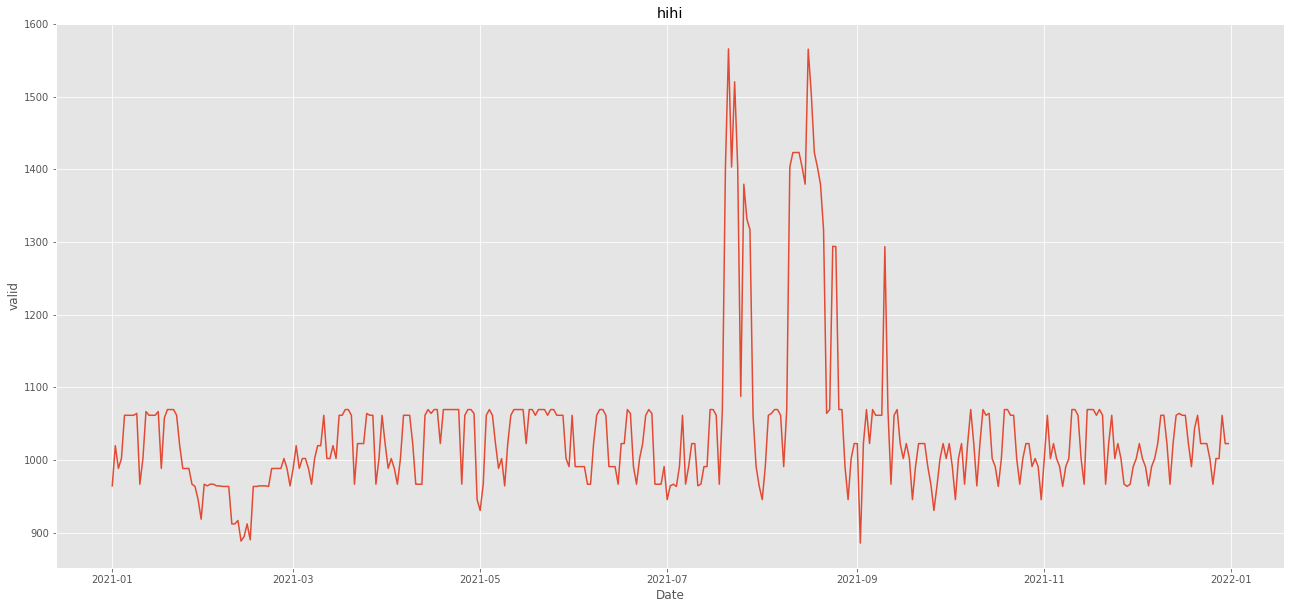

In [40]:
df_test["Ngày"] = pd.to_datetime(df_test["Ngày"])
plt.figure(figsize=(22,10))
plt.plot(df_test["Ngày"],df_test["8"])
plt.title("hihi")
plt.xlabel("Date")
plt.ylabel("valid")
plt.show()


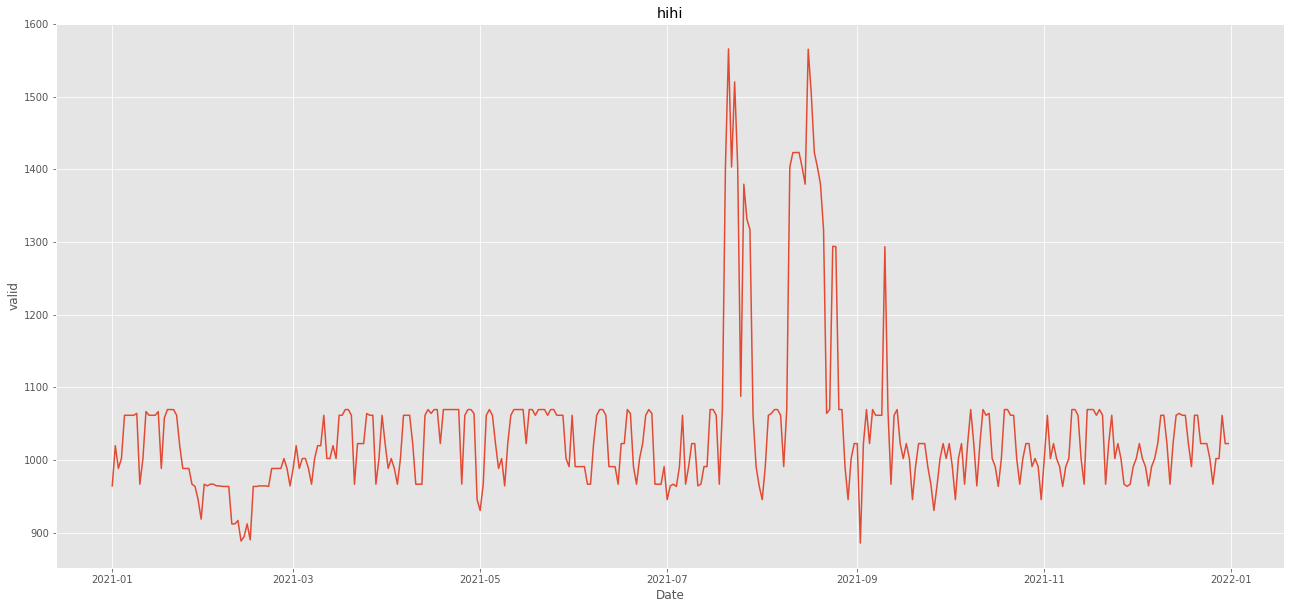

In [41]:
df_test["Ngày"] = pd.to_datetime(df_test["Ngày"])
plt.figure(figsize=(22,10))
plt.plot(df_test["Ngày"],df_test["9"])
plt.title("hihi")
plt.xlabel("Date")
plt.ylabel("valid")
plt.show()


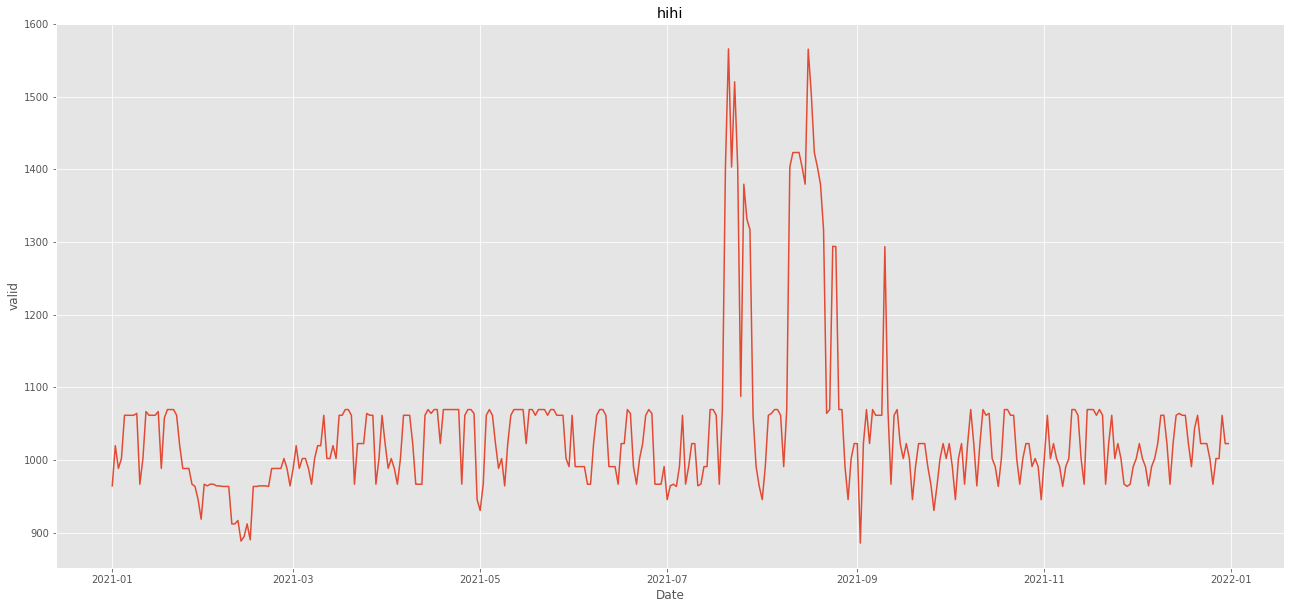

In [47]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(df_test["Ngày"],df_test["8"])
plt.title("hihi")
plt.xlabel("Date")
plt.ylabel("valid")
plt.show()

# lets create time series from weather 
timeSeries = df_test.loc[:, ["Ngày","8"]]
timeSeries.index = timeSeries["Ngày"]
ts = timeSeries.drop("Ngày",axis=1)


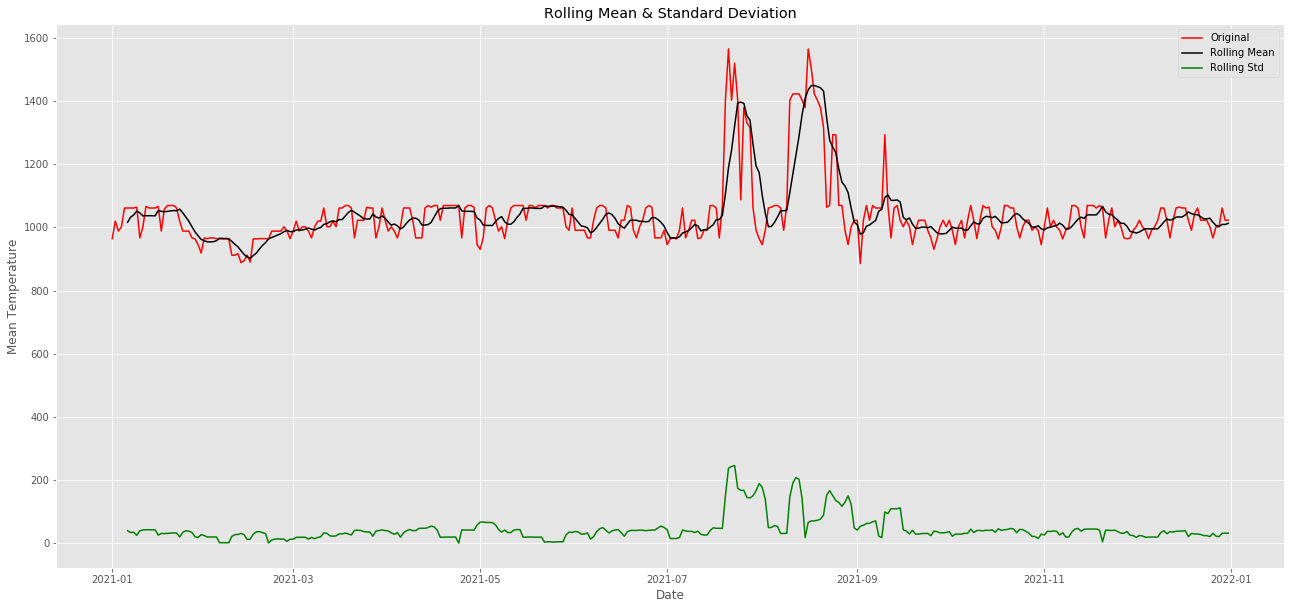

Test statistic: -2.7847590781948495
p-value: 0.0604840207730875
Critical Values: {'1%': -3.44911857009962, '5%': -2.8698097654570507, '10%': -2.5711757061225153}


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Hàm thực hiện kiểm định ADF
def check_adfuller(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Hàm vẽ đồ thị trung bình cuộn và độ lệch chuẩn cuộn
def check_mean_std(ts):
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22, 10))
    plt.plot(ts, color='red', label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label='Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# Giả sử ts đã được định nghĩa và là DataFrame với một cột duy nhất
check_mean_std(ts)
check_adfuller(ts["8"])



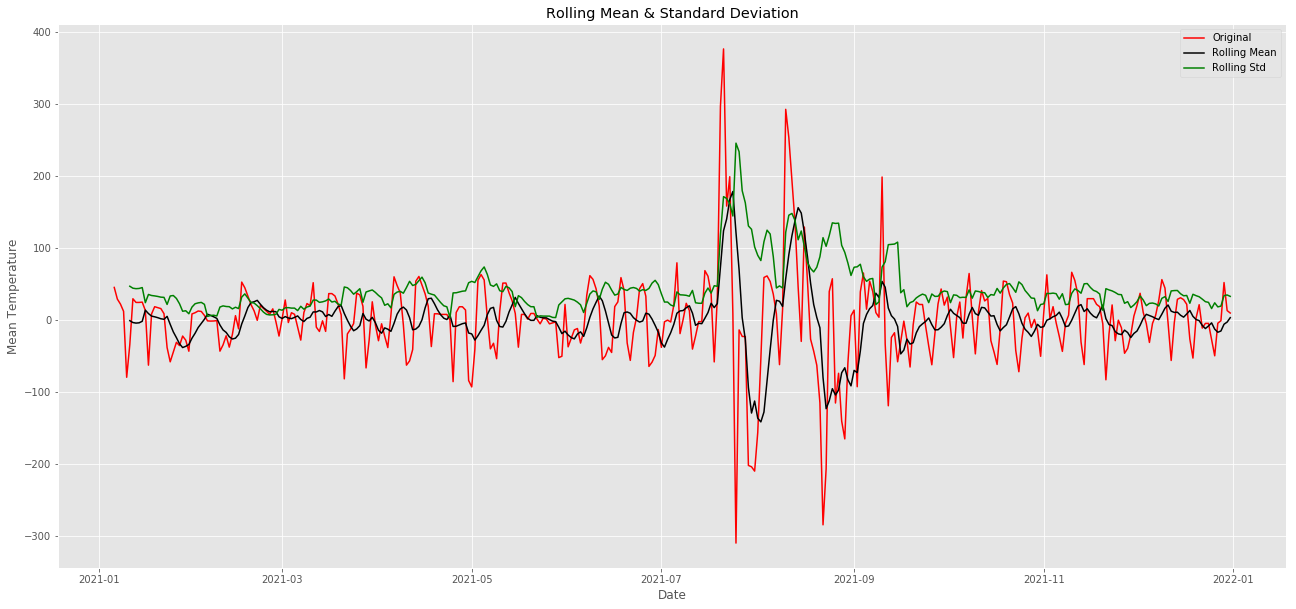

Test statistic: -7.8472045969944855
p-value: 5.726878080101699e-12
Critical Values: {'1%': -3.4495033946549123, '5%': -2.8699787979596136, '10%': -2.5712658305164955}


In [58]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff["8"])

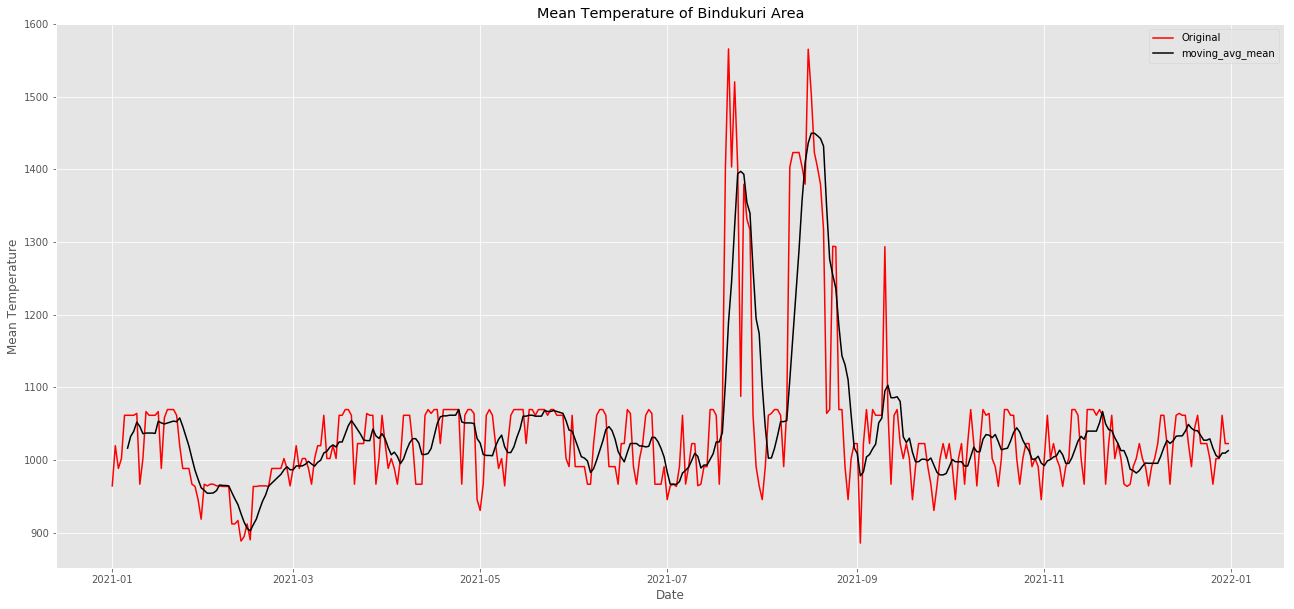

In [59]:
# Moving average method
window_size = 6
moving_avg = pd.rolling_mean(ts,window_size)
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

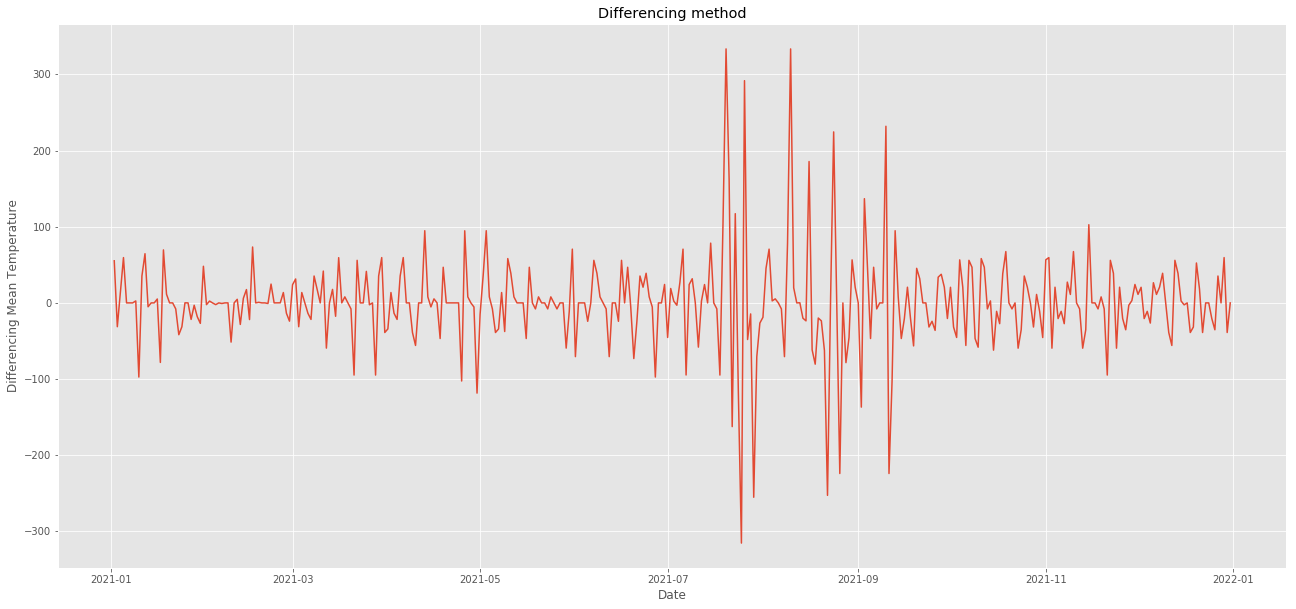

In [60]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

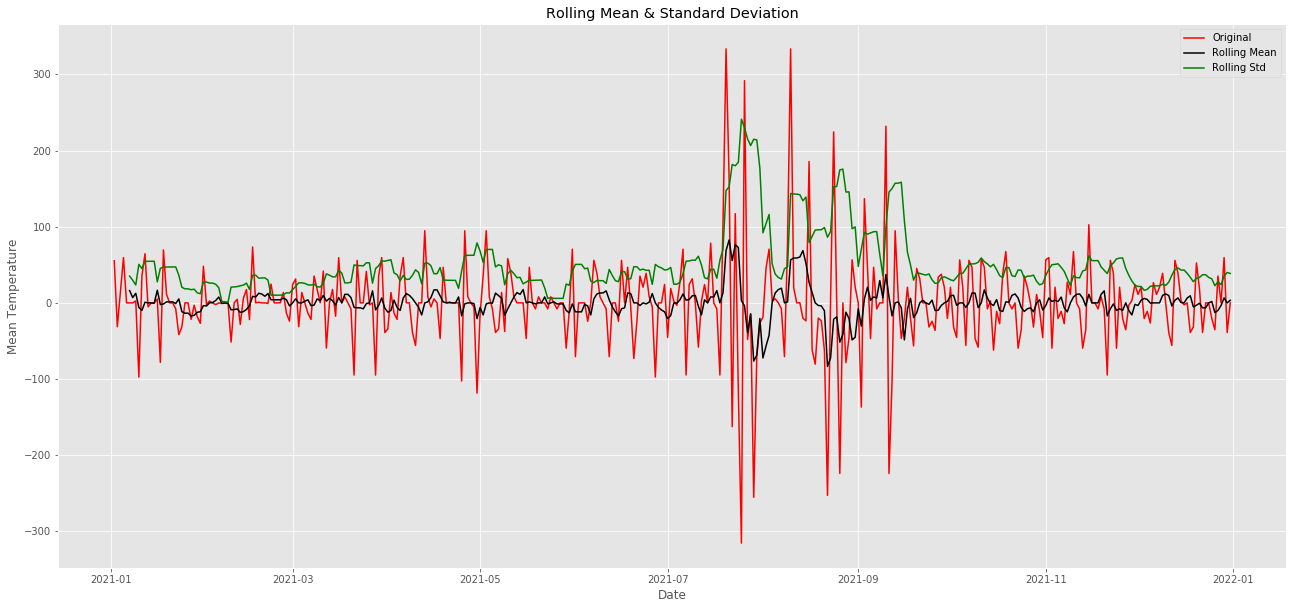

Test statistic: -9.428631294722274
p-value: 5.263026859871259e-16
Critical Values: {'1%': -3.44911857009962, '5%': -2.8698097654570507, '10%': -2.5711757061225153}


In [61]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff["8"])

* Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
* Second one is constant variance. It looks like constant. (yes stationary)
* The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)

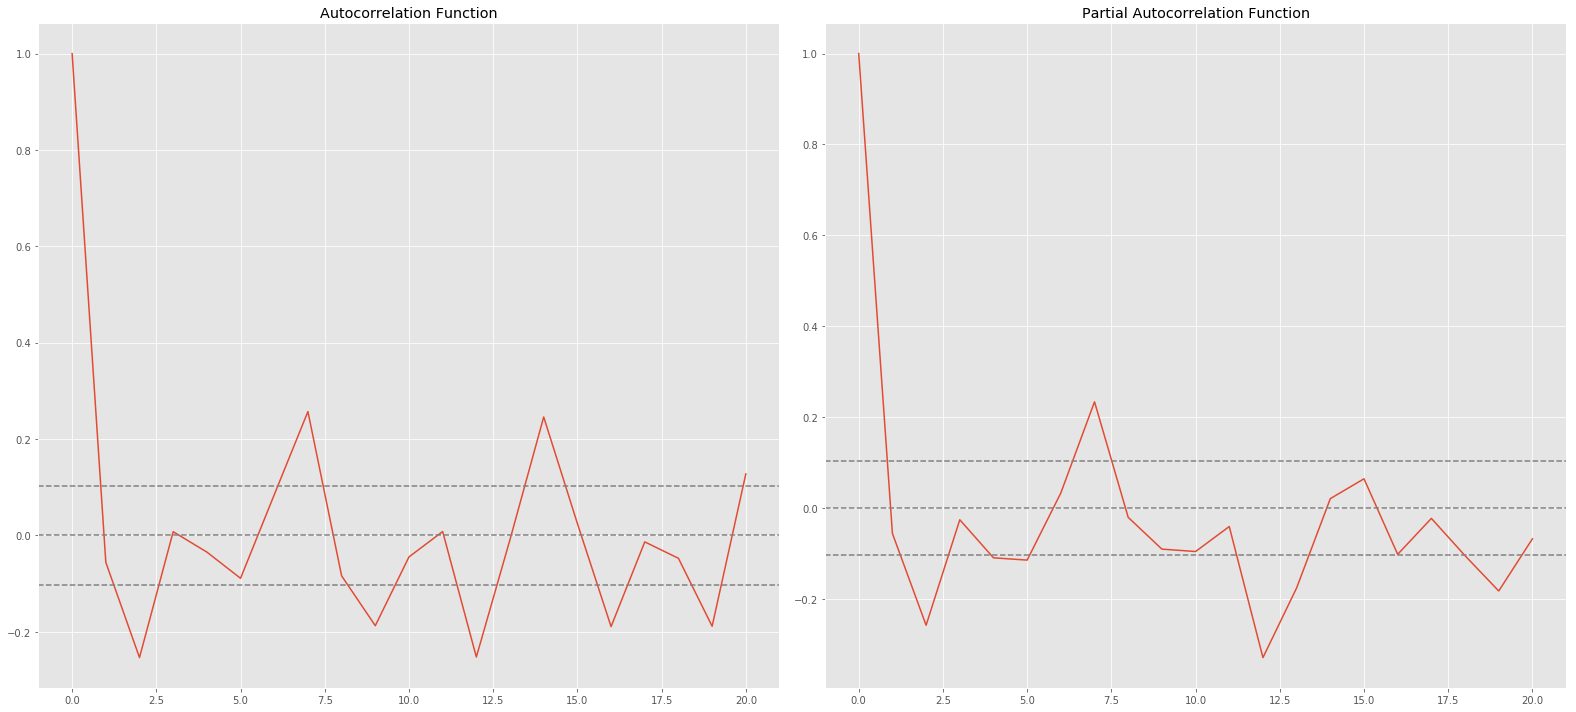

In [62]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

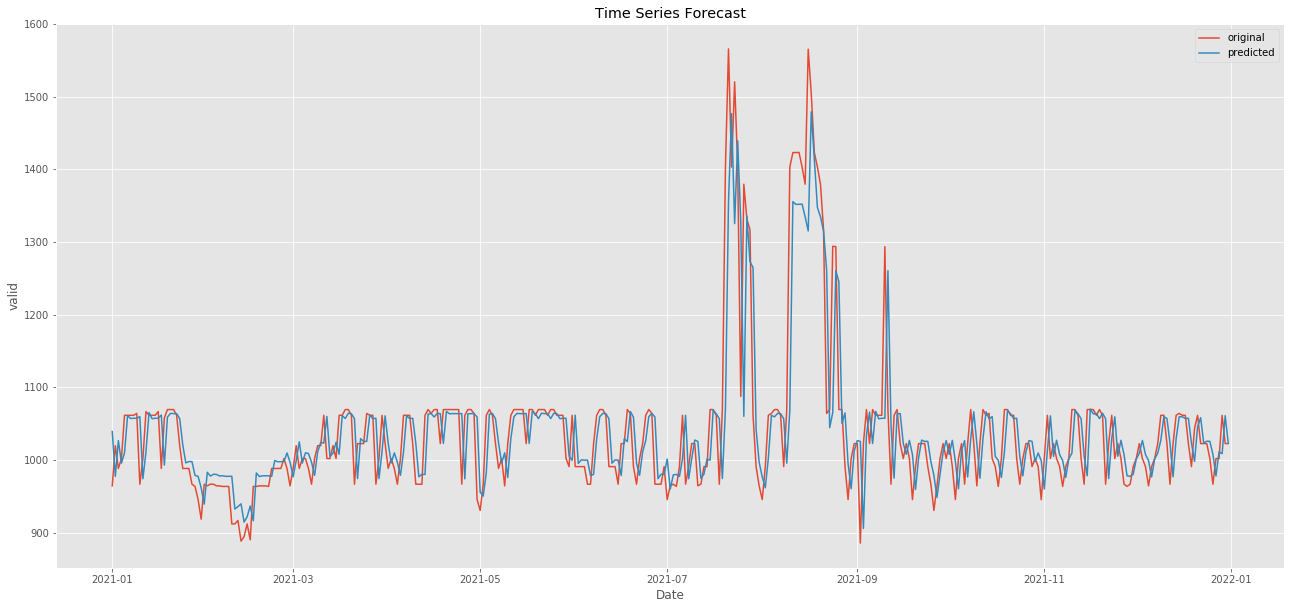

In [66]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(2021,1,1)
end_index = datetime(2021,12,31)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(df_test["Ngày"],df_test["8"],label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("valid")
plt.legend()
plt.show()

* lets predict and visualize all path and find mean squared error

error:  3498.690301022744


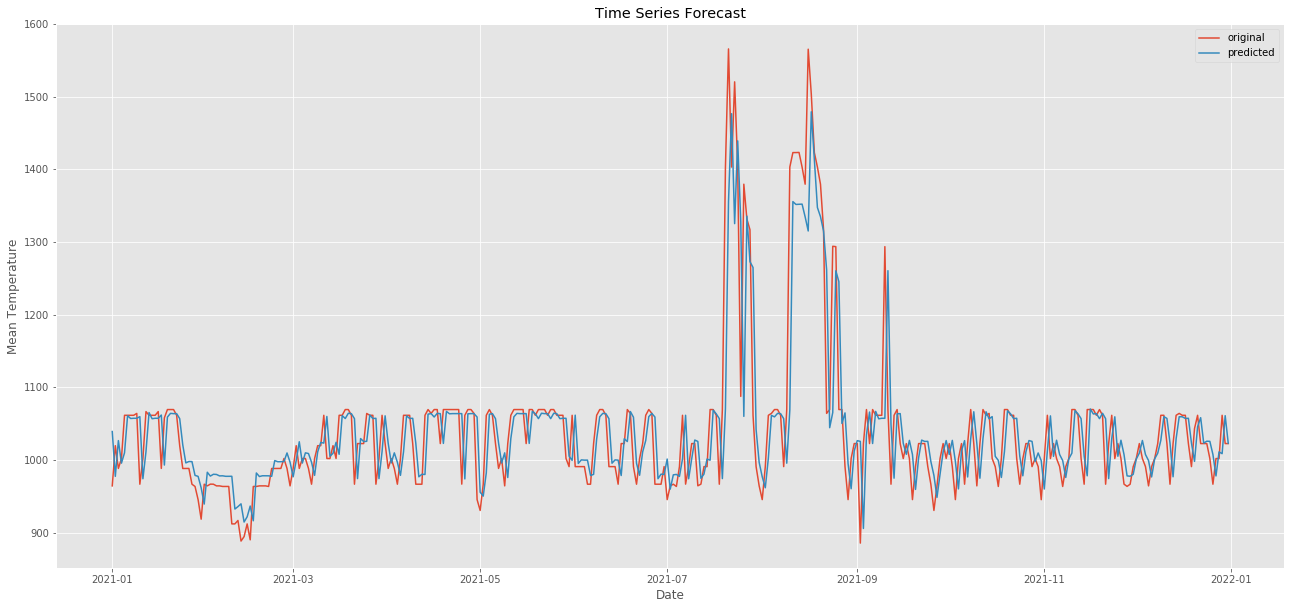

In [70]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(df_test["Ngày"],df_test["8"],label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')
plt.show()

<a id="10"></a> <br>
# Conclusion
* In this tutorial, I want ot make tutorial about ARIMA and make some visualization before it.
* We learn how to make map plots with pyplot. 
* We learn how to make time series forecast.
* **If you have any question advise or feedback, I will be very happy to hear it**